# **Welcome to the Notebook**

### Let's mount the google drive 

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Task 1 : 
Installing pyspark module

In [3]:
!pip install pyspark

     |████████████████████████████████| 204.7MB 63kB/s 
     |████████████████████████████████| 204kB 2.7MB/s 
  Created wheel for pyspark: filename=pyspark-3.0.0-py2.py3-none-any.whl size=205044182 sha256=fd95da363efe776efe96ce3e69715c473a6287feebdbcd2a3141e186a0852c12
  Stored in directory: /root/.cache/pip/wheels/57/27/4d/ddacf7143f8d5b76c45c61ee2e43d9f8492fc5a8e78ebd7d37
Successfully built pyspark


Importing the modules 

In [37]:
from pyspark.sql import SparkSession
from pyspark.sql.functions import count, desc , col, max , struct
import matplotlib.pyplot as plts

creating spark session

In [6]:
spark = SparkSession.builder.appName('Spark App').getOrCreate()

# Task 2 : 
importing the *Listenings.csv* file: 

In [38]:
#loading the file
listening_csv_path = '/content/drive/My Drive/dataset/listenings.csv'
#inforSchema=True to infor for column headers; 'header',True for actually displaying the header
listening_df = spark.read.format('csv').option('inforSchema', True).option('header', True).load(listening_csv_path)

let's check the data:

In [ ]:
listening_df.show()

let's delete useless columns:

In [15]:
listening_df = listening_df.drop('date')

drop the null rows:

In [16]:
listening_df = listening_df.na.drop()

let's check the dataset again:

In [ ]:
listening_df.show()

let's see the schema: 

In [ ]:
listening_df.printSchema()

let's see the shape of our dataframe: 

In [ ]:
shape = (listening_df.count(), len(listening_df.columns))
#.count() -> row count, .columns -> all columns

# Task 3:

**Query #0:**
select two columns: track and artist

In [ ]:
q0 = listening_df.select('artist', 'track')
q0.show()

**Query #1**:

Let's find all of the records of those users who have listened to ***Rihanna***

In [ ]:
q1 = listening_df.select('*').filter(listening_df.artist=='Rihanna')
q1.show()

**Query #2:**

Let's find top 10 users who are fan of ***Rihanna***

In [ ]:
q2 = listening_df.select('user_id').filter(listening_df.artist=='Rihanna')
#q2 now has the number of times each userid listen to Rihanna
q2 = q2.groupby('user_id').agg(count('user_id').alias('count'))
#order descending
q2 = q2.orderBy(desc('count'))
#only first ten from the order
q2 = q2.limit(10)
q2.show()

**Query #3:**

find top 10 famous tracks 

In [ ]:
q3 = listening_df.select('artist', 'track').groupby('artist', 'track').agg(count('*').alias('count'))
q3 = q3.orderBy(desc('count')).limit(10)
q3.show()

**Query #4:**

find top 10 famous tracks of ***Rihanna*** 

In [ ]:
q4 = listening_df.select('artist', 'track').filter(listening_df.artist == 'Rihanna').groupby('artist', 'track').agg(count('*').alias('count').orderBy(desc('count')))
q4.show()

**Query #5:**

find top 10 famous albums 

In [ ]:
q4 = listening_df.select('artist', 'album').groupby('artist', 'album').agg(count('*').alias('count').orderBy(desc('count')))
q4.show()

# Task 4 :
importing the ***genre.csv*** file:

In [28]:
genre_csv_path = '/content/drive/My Drive/dataset/genre.csv'
genre_df = spark.read.format('csv').option('inforSchema', True).option('header', True).load(genre_csv_path)

let's check the data

In [29]:
genre_df.show()

+--------------------+-----+
|              artist|genre|
+--------------------+-----+
|                Muse| rock|
|             Nirvana| rock|
|            Bon Jovi| rock|
|          The Police| rock|
|                Kiss| rock|
|       Guns N' Roses| rock|
|         Rusted Root| rock|
|Katrina and the W...|  pop|
|         The Beatles| rock|
|        Hall & Oates|  pop|
|        Otis Redding| soul|
|         Marvin Gaye| soul|
|     The Cranberries| rock|
|            Survivor| rock|
|       Fleetwood Mac|blues|
|           Radiohead| rock|
|                Toto| rock|
|                  U2| rock|
|Creedence Clearwa...| rock|
|                 REM| rock|
+--------------------+-----+
only showing top 20 rows



Let's inner join these two data frames

In [31]:
data = listening_df.join(genre_df, how='inner', on=['artist'])
data.show()

+------------+-----------+--------------------+--------------------+--------------------+
|      artist|    user_id|               track|               album|               genre|
+------------+-----------+--------------------+--------------------+--------------------+
|    Jessie J|000Silenced|           Price Tag|         Who You Are| Ariana Grande & ...|
|    Jessie J|000Silenced|           Price Tag|         Who You Are| Jhene Aiko & Rixton|
|    Jessie J|000Silenced|           Price Tag|         Who You Are| Nicki Minaj & Ar...|
|    Jessie J|000Silenced|           Price Tag|         Who You Are|                 pop|
|    Jessie J|000Silenced|Price Tag (Acoust...|           Price Tag| Ariana Grande & ...|
|    Jessie J|000Silenced|Price Tag (Acoust...|           Price Tag| Jhene Aiko & Rixton|
|    Jessie J|000Silenced|Price Tag (Acoust...|           Price Tag| Nicki Minaj & Ar...|
|    Jessie J|000Silenced|Price Tag (Acoust...|           Price Tag|                 pop|
|       Ro

**Query #6**

find top 10 users who are fan of ***pop*** music

In [34]:
q6 = data.select('user_id').filter(data.genre == 'pop').groupby('user_id').agg(count('*').alias('count')).orderBy(desc('count')).limit(10)
q6.show()

+---------------+-----+
|        user_id|count|
+---------------+-----+
|        01Green|  496|
|      momousagi|  400|
|          mrpsb|  400|
|   BlueKnockOut|  378|
|    musicboy80s|  376|
|  incultojurgis|  374|
| ElektricOrchid|  370|
|foreign_fanatic|  350|
|   Kevin_Soutar|  346|
|  landrover2171|  301|
+---------------+-----+



**Query #7**

find top 10 famous genres

In [35]:
q7 = data.select('genre').groupby('genre').agg(count('*').alias('count')).orderBy(desc('count')).limit(10)
q7.show()

+----------+-------+
|     genre|  count|
+----------+-------+
|      rock|2691934|
|       pop|1544747|
|electronic| 551509|
|   hip hop| 532984|
|      folk| 438174|
|indie rock| 431439|
|      punk| 380915|
|       r&b| 344101|
|     metal| 208107|
|     indie| 206726|
+----------+-------+



# Task 5:
**Query #8**

find out each user favourite genre

In [ ]:
q8_1 = data.select('user_id', 'genre').groupby('user_id','genre').agg(count('*').alias('count'))
q8_1.orderBy('user_id')
q8_1.show()

In [ ]:
#struct allows us to combine two or more columns together and find max count 
q8_2 = q8_1.groupby('user_id').agg(max(struct(col('count'), col('genre'))).alias('max')).select(col('user_id'), col('max.genre'))
q8_2.show()

**Query #9**

find out how many pop,rock,metal and hip hop singers we have

and then visulize it using bar chart 

In [44]:
#filter from many genres
q9 = genre_df.select('genre').filter( (col('genre') == 'pop') | (col('genre') == 'rock') | (col('genre') == 'metal') | (col('genre') == 'hip hop') ).groupby('genre').agg(count('genre').alias('Count'))
q9.show()

+-------+-----+
|  genre|Count|
+-------+-----+
|    pop| 6960|
|hip hop| 4288|
|  metal| 1854|
|   rock| 9066|
+-------+-----+



Now, let's visualize the results using ***matplotlib***

In [46]:
q9_list = q9.collect()  

In [48]:
labels = [row['genre'] for row in q9_list]
counts = [row['Count'] for row in q9_list]

print(labels, counts)

['pop', 'hip hop', 'metal', 'rock'] [6960, 4288, 1854, 9066]


now lets visualize these two lists using a bar chart

<BarContainer object of 4 artists>

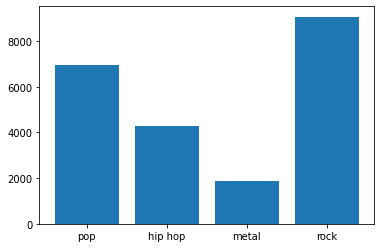

In [49]:
plts.bar(labels, counts)